In [ ]:
#        General content

#sklearn liberary
    data splitter
    metric
    training algorithms
#get data ready
   split data into features and labels
   filling or disregarding missing values
   feature encoding(converting non-numerical values into numeric values)
#pick the model(chose the right estimator or algorithm)
  using guide of selection
  understand the algorithm  
#fit the model
   train our model with the data and adjust parameters
#evaluate the model
   use different metrics for different data
#improve the model
   tunning hyperparameters
   adding more data
#save and reload
   real testing
   make it in production(live)


In [12]:
import pandas as pd
path=("C:/Users/WIN- 10/Downloads/Titanic_Dataset.csv")
df=pd.read_csv(path)
df.head()
#sample=df["passenger_id","name","ticket","cabin","home.des","body"]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [18]:
import pickle
pickle.dump(clf,open("random_forest.pkl",'wb'))#write binary
loaded_model=pickle.load(open(random_forest.pkl,'rb'))
loaded_model.score(x_test,y_test)
import warnings
warnings.filterwarnings("ignore")#we can say default

NameError: name 'clf' is not defined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB
              count        mean         std     min       25%       50%  \
passenger_id  850.0  662.8

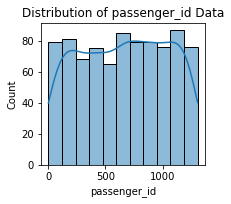

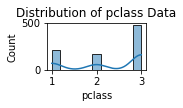

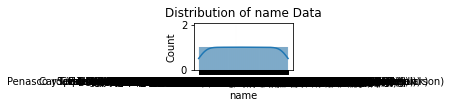

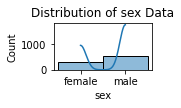

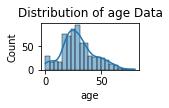

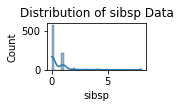

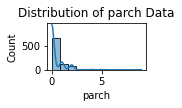

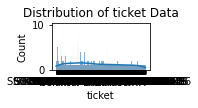

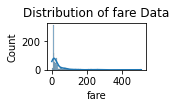

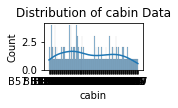

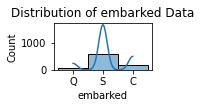

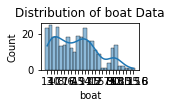

ValueError: num must be 1 <= num <= 12, not 13

<Figure size 432x288 with 0 Axes>

In [15]:
import pandas as pd #in this project to use read_csv
from pandas import read_csv #to read a file as acommon data datatype in pandas i.e dataframe
from  sklearn.model_selection  import train_test_split #for testing and training purpose
from sklearn.linear_model import LinearRegression #the algorithm selected to train our model
import seaborn as sns #in this assignment for plotting
from pandas.plotting import scatter_matrix#to write matrices
from sklearn.metrics import accuracy_score  #we use for predict accuracy
from sklearn import preprocessing #for data preprocessing mainly in this project cleaning
import matplotlib.pyplot as plt #to plot shapes
path=("C:/Users/WIN- 10/Downloads/Titanic_Dataset.csv")
data=read_csv(path)#read csv file using pandas
data.describe()
data.info()
scaler = preprocessing.MinMaxScaler()#the code to  normalize the age
names = ["age"]
d = scaler.fit_transform(data[names])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(50)
data.shape
data.isna().sum()
print(data.describe().T)
plt.figure(figsize=(10,12))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)

    plt.plot()
    plt.show()
print('\n')


# sns.pairplot(data,x_vars=["PassangerId","Pclass","Name","Sex","Age","Sibsp","Parch","Ticket","Fare","Cabin","Embarked", axis =1],y_vars= "Survived",axis=1)
def clean(data):
    data=data.drop(["Ticket","Cabin","Name","PassengerId"], axis=1)
    cols=["SibSp","Parch","Fare","age"]
    for col in cols:
        data[col].fillna(data[col].median(),inplace=True)
    data.Embarked.fillna("U" ,inplace=True)#to replace embarked with most frequent value
    return data       
data=clean(data)
print(data)
le=preprocessing.LabelEncoder()
cols=["Embarked","Sex"]#change Embarked and sex into number for learning purpose
for col in cols:
    data[col]=le.fit_transform(data[col])#loop over cols to fit outr model
# print(data)
print(le.classes_)

#visualization using different techniques
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(17,12));
fig.suptitle("count plot visualization",c="green",size=25)
sns.countplot("Survived",data=data,hue="Sex" ,ax=axs[0][0])
axs[0][0].set_title("visualization of survived values with respect to 'sex'",c='purple')

sns.countplot("Survived",data=data,hue="SibSp" ,ax=axs[0][1])
axs[0][1].set_title("visualization of survived values with respect to number of siblings and spouse",c='purple')
axs[0][1].legend(title="SIBSP",loc='upper right')
                 
sns.countplot("Survived",data=data,hue="Parch" ,ax=axs[1][0])
axs[1][0].set_title("visualization of survived values with respect to parent and children",c='purple')
axs[1][0].legend(title="PARCH",loc='upper right')    

sns.countplot("Survived",data=data,hue="Embarked" ,ax=axs[1][1])
axs[1][0].set_title("visualization of survived values with respect to embarked",c='purple')
axs[1][0].legend(title="EMBARKED",loc='upper right') 
plt.show()


In [16]:
#import important liberaries to train our model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#logistic regression
import numpy as np#for use in confusion matrix
import itertools
from  sklearn.model_selection  import train_test_split #for testing and training purpose
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#split our data into train and test
l_regression=LogisticRegression()
LR_model=l_regression.fit(x_train,y_train)#logisyic regression model
l_regression_score=round(l_regression.score(x_train,y_train)*100,2)
prediction=LR_model.predict(x_test)
print(prediction)
print("*************************************************************************")#just for style 

print("the accuracy for logistic regression model is ",l_regression_score)
#this code mainly designed for drawing confusion matrices
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#A fundction that plots confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[: ,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,prediction, labels=[1,0]))

cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived','Not Survived'],normalize= False,  title='Confusion matrix')
#Classification report of the logistic regresison
from sklearn.metrics import classification_report
print (classification_report(y_test, prediction))


NameError: name 'x' is not defined

In [ ]:

r_forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
RF_model=r_forest.fit(x_train,y_train)#random forest model
r_forest_score=round(r_forest.score(x_train,y_train)*100,2)
RF_output=RF_model.predict(x_test)
print(RF_output)
print("***************************************************")
print("the accuracy of random forest model is",r_forest_score)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#A fundction that plots confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,prediction, labels=[1,0]))

cnf_matrix = confusion_matrix(y_test, prediction, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived','Not Survived'],normalize= False,  title='Confusion matrix')
#Classification report of the logistic regresison
from sklearn.metrics import classification_report#for report purpose
print (classification_report(y_test, RF_output))


In [ ]:
#descion tree model
d_tree=DecisionTreeClassifier()
D_model=d_tree.fit(x_train,y_train)#Descision tree model
d_tree_score=round(d_tree.score(x_train,y_train)*100,2)#round and express in percentage of prediction
prediction=D_model.predict(x_test)
print(prediction)
print("********************************************************************************")
print("the accuracy of descion tree model is ",d_tree_score)

In [ ]:
# k nearest neighbors
k_nearest= KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
K_model=k_nearest.fit(x_train,y_train)
k_nearest_score=round(model.score(x_train,y_train)*100,2)
prediction=K_model.predict(x_test)
print(prediction)
print("**************************************************************")
print("the accuracy of k_nearest tree model is ",k_nearest_score)

In [ ]:
#gaussian NB
gaussian=GaussianNB()
G_model=gaussian.fit(x_train,y_train)
gaussian_model_score=round(model.score(x_train,y_train)*100,2)
prediction=G_model.predict(x_test)
print(prediction)
print("**************************************************************")
print("the accuracy of naive bayes model is ",gaussian_model_score)

In [ ]:
# import pandas as pd
selection=pd.DataFrame({'Models':['Logistic','DecisionTree','RandomForest','GaussianNB','KNN'],
                        'Accuracy values':[l_regression_score,d_tree_score,r_forest_score,gaussian_model_score,k_nearest_score]})
selection.sort_values(by='Accuracy values',ascending=False)#to see the performance from the above outputs

In [ ]:
import matplotlib.style as style
style.use('ggplot')
sns.set_theme(style="whitegrid")
sns.barplot(x="Models",y="Accuracy values",data=selection,palette="BuGn_r");
plt.xticks(rotation=45)
plt.title("bar plot for comaring scores for different models",weight="bold" ,size=15)

In [ ]:
#from the graph we can choose either Descion tree or Random forest
#let us predict using random forest
RF_output=RF_model.predict(x_test)
print(RF_output)